# Used Car Price Prediction

## Import Data

In [12]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Schritt 2: Daten einlesen
df_sales = pd.read_csv("Car_Sales.csv")
df_specs = pd.read_csv("data.csv")


In [14]:
def model_performance(features, df, random_forest_model = RandomForestRegressor(random_state=42)):
    df = df.sample(frac=1, random_state=42)
    X, y = df[features], df['Price ($)']
    scores = cross_val_score(random_forest_model, X, y, scoring="neg_root_mean_squared_error", cv=5)
    print('CV results RMSE:', np.round(scores))
    print('Mean RMSE:', np.mean(np.round(scores, 0)))

features = ["Annual Income"]
model_performance(features, df_sales)

CV results RMSE: [-15182. -15511. -15641. -15442. -15352.]
Mean RMSE: -15425.6


In [15]:
df_specs  = pd.read_csv("data.csv")
df_specs.rename(columns={'Make': 'Company'}, inplace=True)

df_sales['Company'] = df_sales['Company'].str.lower().str.strip()
df_sales['Model'] = df_sales['Model'].str.lower().str.strip()

df_specs['Company'] = df_specs['Company'].str.lower().str.strip()
df_specs['Model'] = df_specs['Model'].str.lower().str.strip()

df_specs_avg = df_specs.groupby(['Company', 'Model'], as_index=False)['Engine HP'].mean()

df_merged = df_sales.merge(
    df_specs_avg,
    on=['Company', 'Model'],
    how='left'
)

print("Vor dem Merge:", df_sales.shape)
print("Nach dem Merge:", df_merged.shape)
print(df_merged[['Company', 'Model', 'Engine HP']].head())

print("Anzahl Autos mit Engine HP:", df_merged['Engine HP'].notna().sum())
df_merged.to_csv("car_data_merged.csv", index=False)

Vor dem Merge: (23906, 16)
Nach dem Merge: (23906, 17)
    Company       Model   Engine HP
0      ford  expedition  365.000000
1     dodge     durango  307.571429
2  cadillac    eldorado  289.285714
3    toyota      celica  160.000000
4     acura          tl  293.043478
Anzahl Autos mit Engine HP: 17689


In [16]:
# Before data merge Mean RMSE: -15425.6

features = ["Price ($)", "Engine HP"]
model_performance(features, df_merged)

CV results RMSE: [-10. -20. -10. -16. -19.]
Mean RMSE: -15.0


In [17]:
print('Total cars before data cleaning:', len(df_merged))

# Remove missing values
df = df_merged.dropna()

# Remove duplicates
df_merged = df_merged.drop_duplicates()

print('Total cars after data cleaning:', len(df_merged))

Total cars before data cleaning: 23906
Total cars after data cleaning: 23906


In [18]:
# Before data cleaning Mean RMSE: -15.0

features = ["Price ($)", "Engine HP"]
model_performance(features, df_merged)

CV results RMSE: [-10. -20. -10. -16. -19.]
Mean RMSE: -15.0


## Remove / Drop empty values

              Missing Count  Missing %
county                 1000      100.0
size                    751       75.1
condition               420       42.0
VIN                     370       37.0
cylinders               347       34.7
drive                   313       31.3
type                    293       29.3
paint_color             230       23.0
manufacturer             97        9.7
title_status             70        7.0
fuel                     40        4.0
year                     37        3.7
long                     35        3.5
lat                      35        3.5
model                    35        3.5
odometer                 30        3.0
description              27        2.7
transmission             27        2.7
posting_date             27        2.7
image_url                27        2.7
region_url                0        0.0
url                       0        0.0
id                        0        0.0
region                    0        0.0
price                    

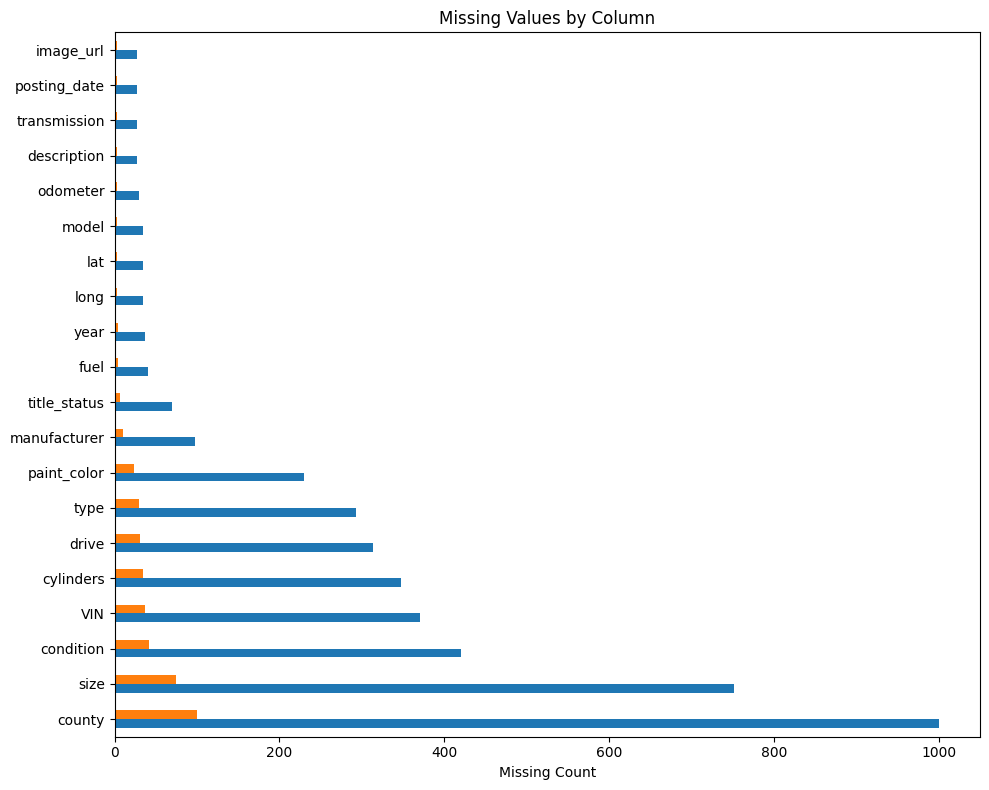

(237, 23)


,id,url,region,region_url,price,year,manufacturer,model,cylinders,fuel,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
32,7316343444,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2012.0,gmc,sierra 2500 hd extended cab,8 cylinders,gas,...,1GT220CG8CZ231238,4wd,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.48000,2021-05-03T13:41:25-0500
33,7316304717,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,34590,2016.0,chevrolet,silverado 1500 double,6 cylinders,gas,...,1GCVKREH6GZ228691,4wd,pickup,silver,https://images.craigslist.org/00E0E_iKN07Sh7ou...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.48000,2021-05-03T12:41:33-0500
35,7316257769,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29990,2016.0,chevrolet,colorado extended cab,6 cylinders,gas,...,1GCHTCE37G1186784,4wd,pickup,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.48000,2021-05-03T11:31:14-0500
36,7316133914,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,38590,2011.0,chevrolet,corvette grand sport,8 cylinders,gas,...,1G1YR3DW3B5102190,rwd,other,red,https://images.craigslist.org/00U0U_kKYnS1LWh8...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.48000,2021-05-03T07:50:35-0500
38,7315816316,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,32990,2017.0,jeep,wrangler unlimited sport,6 cylinders,gas,...,1C4BJWDG5HL705371,4wd,other,silver,https://images.craigslist.org/00u0u_bB3krjp4B3...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.48000,2021-05-02T12:22:10-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,7313975305,https://bham.craigslist.org/ctd/d/marietta-201...,birmingham,https://bham.craigslist.org,13999,2018.0,kia,soul,4 cylinders,gas,...,KNDJP3A54J7511716,fwd,wagon,white,https://images.craigslist.org/01616_dUsFq9MSKH...,This Kia Soul can be yours today!If you have b...,al,34.0025,-84.46330,2021-04-28T14:07:46-0500
472,7313975008,https://bham.craigslist.org/ctd/d/marietta-200...,birmingham,https://bham.craigslist.org,7999,2007.0,toyota,camry,6 cylinders,gas,...,JTNBK46K173023939,fwd,sedan,custom,https://images.craigslist.org/01414_lgsaufxzR1...,This Toyota Camry can be yours today!If you ha...,al,34.0025,-84.46330,2021-04-28T14:07:16-0500
473,7313974428,https://bham.craigslist.org/ctd/d/marietta-200...,birmingham,https://bham.craigslist.org,8799,2006.0,acura,tsx,4 cylinders,gas,...,JH4CL96966C008897,fwd,sedan,white,https://images.craigslist.org/00Q0Q_9zah3ZyrwA...,This Acura TSX can be yours today!If you have ...,al,34.0025,-84.46330,2021-04-28T14:06:15-0500
481,7313896890,https://bham.craigslist.org/ctd/d/cullman-2017...,birmingham,https://bham.craigslist.org,0,2017.0,gmc,sierra 1500,8 cylinders,gas,...,3GTU2NEC5HG504207,4wd,truck,white,https://images.craigslist.org/00s0s_3qU3j6ZM6I...,2017 GMC Sierra 1500 4WD Crew Cab 143.5 SLT --...,al,34.2056,-86.85834,2021-04-28T12:01:31-0500


In [12]:
# Show count and percentage of NaNs per column
missing_counts = df_orig.isna().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(df_orig)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2)
})

print(missing_summary)

import matplotlib.pyplot as plt

missing_summary[missing_summary["Missing %"] > 0].plot(kind='barh', figsize=(10, 8), legend=False)
plt.title("Missing Values by Column")
plt.xlabel("Missing Count")
plt.tight_layout()
plt.show()

df = df_orig.drop(columns=['county', 'size','condition'])

df = df.dropna()
print(df.shape)
df.head(100)

## Model Performance 1

In [5]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['rooms', 'area', 'pop', 'pop_dens', 'frg_pct',
                                                        'emp', 'tax_income']], 
                                                         df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

NameError: name 'df' is not defined

In [ ]:
# train linear_model = LinearRegression()
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train, y_train)
print("Train score: ", linear_model.score(X_train, y_train))
print("Test score: ", linear_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, linear_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, linear_model.predict(X_test)))

views                  1689
med_salary           117569
max_salary            94056
remote_allowed       108603
fips                  27415
normalized_salary     87776
dtype: int64


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=0.

In [ ]:
# train random_forest_model = RandomForestRegressor()
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model
random_forest_model.fit(X_train, y_train)
print("Train score: ", random_forest_model.score(X_train, y_train))
print("Test score: ", random_forest_model.score(X_test, y_test))

print("Train RMSE: ", root_mean_squared_error(y_train, random_forest_model.predict(X_train)))
print("Test RMSE: ", root_mean_squared_error(y_test, random_forest_model.predict(X_test)))

### Seperate Location State and City

In [ ]:
# Step 2: Extract city and state
df['city'] = df['location'].apply(
    lambda x: x.split(',')[0].strip() if ',' in x else None
)
df['state'] = df['location'].apply(
    lambda x: x.split(',')[1].strip() if ',' in x else None
)
# Step 3: Abbreviation to full state name
us_state_abbrev = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}


df['state_full'] = df['state'].map(us_state_abbrev)

df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,city,state,state_full
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,Princeton,NJ,New Jersey
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,Fort Collins,CO,Colorado
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,Cincinnati,OH,Ohio
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,New Hyde Park,NY,New York
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,Burlington,IA,Iowa
